In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Limits and Derivatives
**Instructor:** Isidora Rojas\
**TAs:** Joey Carter and Lauren Harvey

## Learning Objectives
- Explain a limit and use it to define the derivative
- Compute derivatives using power, product, quotiend, and chain rule
- 

## Limits

We say that the limit of $ f(x) $ is $L$ as $x$ approaches $a$ and write this as:

$$\lim_{x \to a} f(x) = L$$

This means we can make $f(x)$ as close to $L$ as we want for all $x$ sufficiently close to $a$, from both sides, without actually letting $x$ be $a$.

**Simple Example:**

$$\lim_{x \to 10} \frac{x}{2} = 5$$

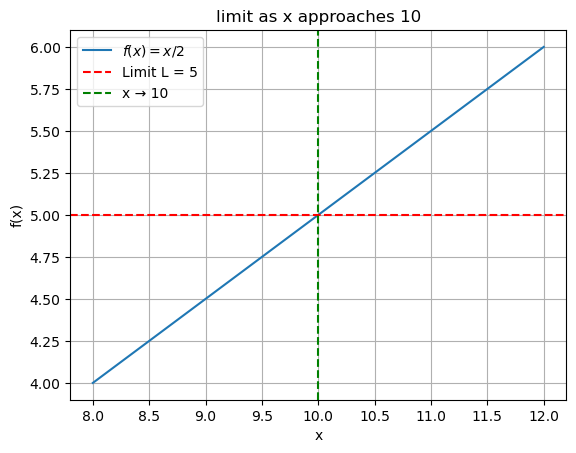

In [5]:
x = np.linspace(8, 12, 200)
y = x/2

plt.plot(x, y, label="$f(x) = x/2$")
plt.axhline(5, color="red", linestyle="--", label="Limit L = 5")
plt.axvline(10, color="green", linestyle="--", label="x → 10")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.title("limit as x approaches 10")
plt.show()

### Kinds of Limits 
Note: this will not be covered during workshop time but is intended to be used as a reference


1. **Two-sided limit**  
   $\lim_{x \to a} f(x) = L$
   Requires $f(x)$ to approach the same $L$ from both the left ($x \to a^-$) and the right ($x \to a^+$).

2. **One-sided limits**  
   - Left-hand limit:  
     $\lim_{x \to a^-} f(x) = L$ 
   - Right-hand limit:  
     $\lim_{x \to a^+} f(x) = L$$ 

3. **Limits at infinity**  
   - $\lim_{x \to \infty} f(x)$ 
   - $\lim_{x \to -\infty} f(x)$  
   Used to describe asymptotic behavior.

4. **Infinite limits**  
   - $\lim_{x \to a} f(x) = \infty$  
   Means $f(x)$ grows without bound as $x$ approaches $a$.



---


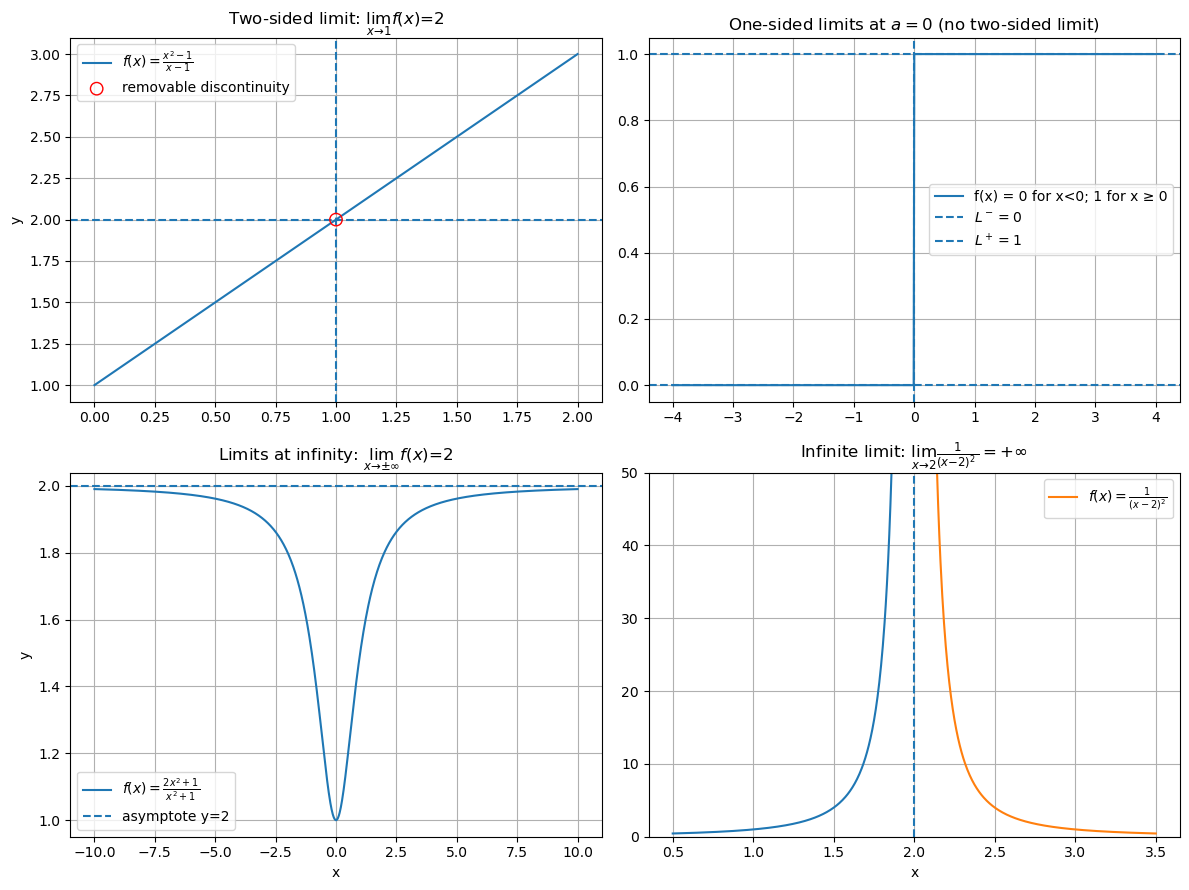

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# two-sided limit:
ax = axes[0, 0]
a = 1.0
x = np.linspace(0, 2, 600)
y = (x**2 - 1) / (x - 1)           # equals x+1 for x != 1
y[np.isclose(x, a, atol=1e-6)] = np.nan  # hide the undefined point
ax.plot(x, y, label=r"$f(x)=\frac{x^2-1}{x-1}$")
ax.axvline(a, linestyle="--")                 # approach point
ax.axhline(2, linestyle="--")                 # limit value
ax.scatter([a], [2], facecolors="none", edgecolors="red", s=80, zorder=3,
           label="removable discontinuity")
ax.set_title("Two-sided limit: $\\lim_{x\\to 1} f(x) = 2$")
ax.grid(True)
ax.legend(loc="best")

# one-sided limits: step (different left/right limits at a=0)
ax = axes[0, 1]
a = 0.0
x = np.linspace(-4, 4, 801)
f = np.where(x < 0, 0.0, 1.0)
ax.plot(x, f, label="f(x) = 0 for x<0; 1 for x ≥ 0")
ax.axvline(a, linestyle="--")
ax.axhline(0, linestyle="--", label=r"$L^- = 0$")
ax.axhline(1, linestyle="--", label=r"$L^+ = 1$")
ax.set_title("One-sided limits at $a=0$ (no two-sided limit)")
ax.grid(True)
ax.legend(loc="best")

# limits at infinity- horizontal asymptote
ax = axes[1, 0]
x = np.linspace(-10, 10, 1201)
f = (2*x**2 + 1) / (x**2 + 1)
ax.plot(x, f, label=r"$f(x)=\frac{2x^2+1}{x^2+1}$")
ax.axhline(2, linestyle="--", label="asymptote y=2")
ax.set_title(r"Limits at infinity: $\lim_{x\to\pm\infty} f(x)=2$")
ax.grid(True)
ax.legend(loc="best")

# infinite limit at a point: vertical asymptote
#    f(x) = 1/(x-2)^2 -> +∞ as x -> 2
ax = axes[1, 1]
a = 2.0

x_left  = np.linspace(0.5, 1.95, 400)
x_right = np.linspace(2.05, 3.5, 400)
f_left  = 1.0 / (x_left - a)**2
f_right = 1.0 / (x_right - a)**2
ax.plot(x_left, f_left)
ax.plot(x_right, f_right, label=r"$f(x)=\frac{1}{(x-2)^2}$")
ax.axvline(a, linestyle="--")                 # vertical asymptote
ax.set_ylim(0, min(50, max(f_left.max(), f_right.max())))  # keep plot readable
ax.set_title(r"Infinite limit: $\lim_{x\to 2} \frac{1}{(x-2)^2}=+\infty$")
ax.grid(True)
ax.legend(loc="best")

for ax in axes[1, :]:
    ax.set_xlabel("x")
for ax in axes[:, 0]:
    ax.set_ylabel("y")

plt.tight_layout()
plt.show()
